## Random Forest Classification - Ensemble Technique - Bagging

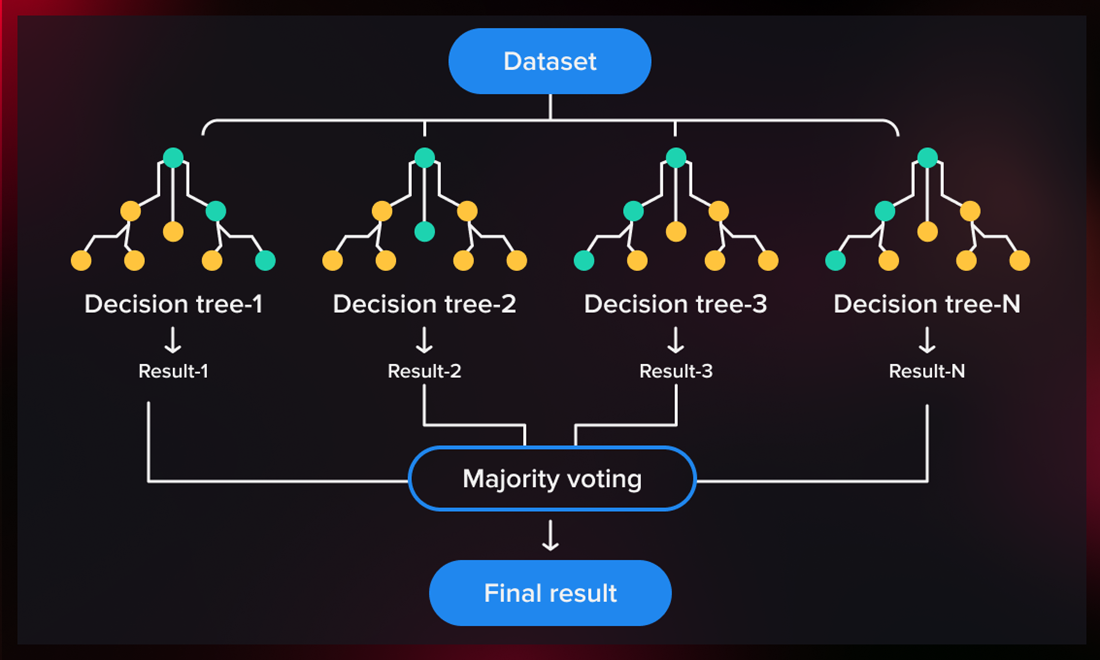

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read the train_titanic.csv

In [2]:
import pandas as pd
df = pd.read_csv('train_titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


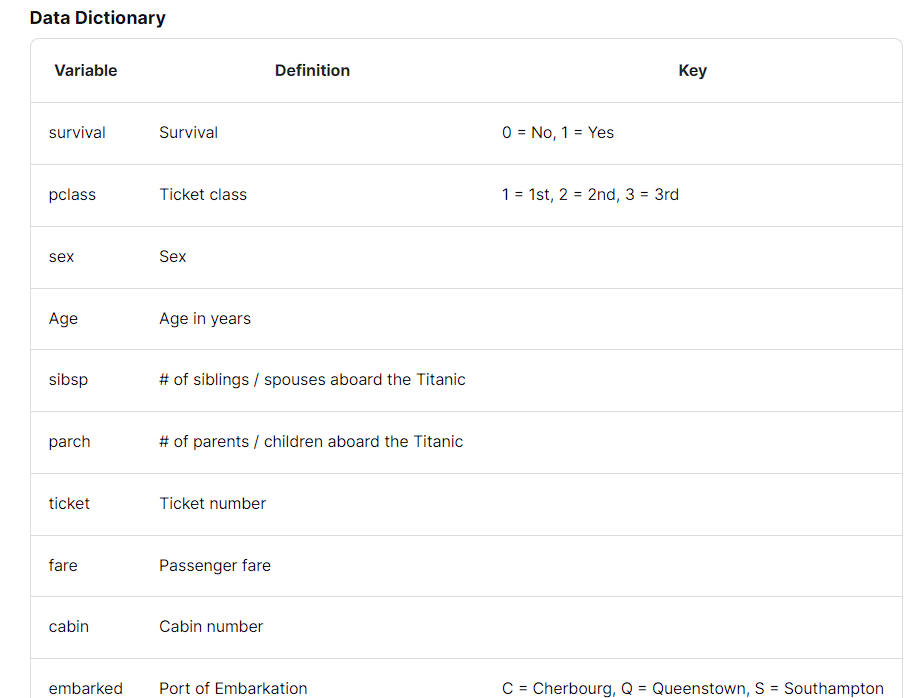

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Missing Value

In [5]:
s = df.isna().sum()
s

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
s[s>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

#### Check of duplicates

In [7]:
df.duplicated().sum()

0

#### Drop Duplicates if there are more duplicates

In [8]:
df = df.drop_duplicates(keep='first')

#### Seperate X and Y (Survived)

Survived ~ Remaining Features

In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
X = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'])
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S


In [13]:
X.mean(numeric_only=True)

Pclass     2.308642
Age       29.699118
SibSp      0.523008
Parch      0.381594
Fare      32.204208
dtype: float64

In [14]:
X.median(numeric_only=True)

Pclass     3.0000
Age       28.0000
SibSp      0.0000
Parch      0.0000
Fare      14.4542
dtype: float64

In [15]:
Y = df[['Survived']]
Y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [16]:
Y.value_counts()

Survived
0           549
1           342
Name: count, dtype: int64

#### Seperate cat and con features for X

In [17]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [18]:
cat

['Sex', 'Cabin', 'Embarked']

In [19]:
con

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

#### Create a Preprocessing Pipeline

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


In [21]:
# Numeric Pipeline
num_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='median')),
                           ('scaler',StandardScaler())])
# Categorical Pipeline
cat_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='constant', fill_value='unknown')),
                           ('ohe',OneHotEncoder(handle_unknown='ignore'))])

# Combine Pipeline with ColumnTransformer
pre = ColumnTransformer ([('num',num_pipe,con),
                          ('cat',cat_pipe,cat)])


In [23]:
X_pre = pre.fit_transform(X).toarray()
X_pre

array([[ 0.82737724, -0.56573646,  0.43279337, ...,  0.        ,
         1.        ,  0.        ],
       [-1.56610693,  0.66386103,  0.43279337, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.82737724, -0.25833709, -0.4745452 , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.82737724, -0.1046374 ,  0.43279337, ...,  0.        ,
         1.        ,  0.        ],
       [-1.56610693, -0.25833709, -0.4745452 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.82737724,  0.20276197, -0.4745452 , ...,  1.        ,
         0.        ,  0.        ]])

In [24]:
cols = pre.get_feature_names_out()
cols

array(['num__Pclass', 'num__Age', 'num__SibSp', 'num__Parch', 'num__Fare',
       'cat__Sex_female', 'cat__Sex_male', 'cat__Cabin_A10',
       'cat__Cabin_A14', 'cat__Cabin_A16', 'cat__Cabin_A19',
       'cat__Cabin_A20', 'cat__Cabin_A23', 'cat__Cabin_A24',
       'cat__Cabin_A26', 'cat__Cabin_A31', 'cat__Cabin_A32',
       'cat__Cabin_A34', 'cat__Cabin_A36', 'cat__Cabin_A5',
       'cat__Cabin_A6', 'cat__Cabin_A7', 'cat__Cabin_B101',
       'cat__Cabin_B102', 'cat__Cabin_B18', 'cat__Cabin_B19',
       'cat__Cabin_B20', 'cat__Cabin_B22', 'cat__Cabin_B28',
       'cat__Cabin_B3', 'cat__Cabin_B30', 'cat__Cabin_B35',
       'cat__Cabin_B37', 'cat__Cabin_B38', 'cat__Cabin_B39',
       'cat__Cabin_B4', 'cat__Cabin_B41', 'cat__Cabin_B42',
       'cat__Cabin_B49', 'cat__Cabin_B5', 'cat__Cabin_B50',
       'cat__Cabin_B51 B53 B55', 'cat__Cabin_B57 B59 B63 B66',
       'cat__Cabin_B58 B60', 'cat__Cabin_B69', 'cat__Cabin_B71',
       'cat__Cabin_B73', 'cat__Cabin_B77', 'cat__Cabin_B78',
       '

In [25]:
X_pre = pd.DataFrame(X_pre, columns=cols)
X_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Cabin_A10,cat__Cabin_A14,cat__Cabin_A16,...,cat__Cabin_F33,cat__Cabin_F38,cat__Cabin_F4,cat__Cabin_G6,cat__Cabin_T,cat__Cabin_unknown,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S,cat__Embarked_unknown
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


#### Train Test Split

In [26]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)

In [27]:
xtrain.shape

(712, 159)

In [28]:
xtest.shape

(179, 159)

#### Create a Random forest Model

In [29]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1, max_depth=2, min_samples_split=3, min_samples_leaf=1, criterion='entropy')
model.fit(xtrain,ytrain)

RandomForestClassifier(criterion='entropy', max_depth=2, min_samples_split=3,
                       n_estimators=1)

In [31]:
# Accuracy score in training
model.score(xtrain,ytrain)

0.6896067415730337

In [32]:
# Acurracy score in testing
model.score(xtest, ytest)

0.7039106145251397

#### Hyperparameter tunning

In [33]:
params = {'n_estimators':[10,50,100,200],
          'max_depth' : [2,3,4,5,6,7,8],
          'min_samples_split' : [5,6,7,8,9],
          'criterion' : ['gini','entropy']}

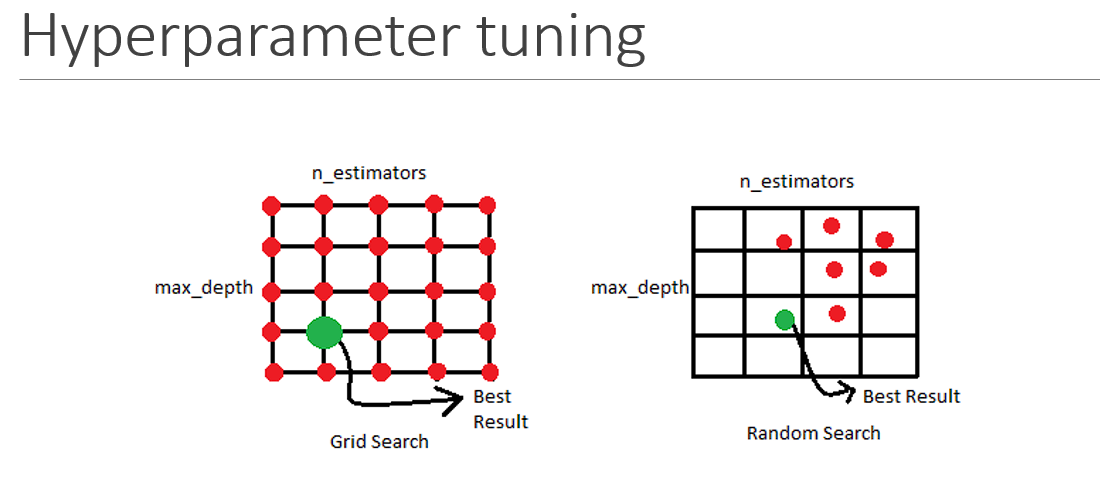

In [34]:
from sklearn.model_selection import RandomizedSearchCV
rfc = RandomForestClassifier()
rscv = RandomizedSearchCV(rfc, param_distributions=params, cv=5, scoring='f1')
rscv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8],
                                        'min_samples_split': [5, 6, 7, 8, 9],
                                        'n_estimators': [10, 50, 100, 200]},
                   scoring='f1')

In [35]:
rscv.best_params_

{'n_estimators': 10,
 'min_samples_split': 5,
 'max_depth': 8,
 'criterion': 'entropy'}

In [36]:
rscv.best_score_

0.7286726164217765

In [38]:
best_rfc = rscv.best_estimator_
best_rfc

RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_split=5,
                       n_estimators=10)

#### Evaluate model Accuracy

In [39]:
best_rfc.score(xtrain,ytrain)

0.8778089887640449

In [40]:
best_rfc.score(xtest,ytest)

0.7988826815642458

#### Predict Train and Test data

In [41]:
ypred_tr = best_rfc.predict(xtrain)
ypred_ts = best_rfc.predict(xtest)

In [42]:
ypred_tr[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [43]:
ytrain.head()

,Survived
331,0
733,0
382,0
704,0
813,0


In [44]:
ypred_ts[0:5]

array([0, 0, 0, 1, 1], dtype=int64)

In [46]:
ytest.head()

,Survived
709,1
439,0
840,0
720,1
39,1


#### Confusion Matrix

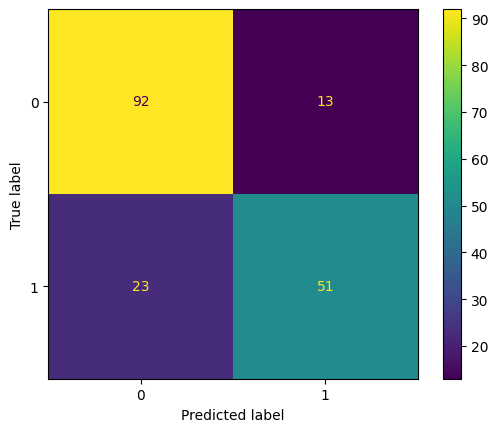

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=best_rfc.classes_)
cfd.plot()

#### Check classification Report

In [50]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



#### Get Feature importances

In [51]:
imp = best_rfc.feature_importances_
imp = pd.Series(imp)
imp.index = xtrain.columns
imp = imp.sort_values(ascending=False)
imp

cat__Sex_female       0.308808
cat__Sex_male         0.122746
num__Fare             0.103354
num__Age              0.093689
cat__Cabin_unknown    0.080210
                        ...   
cat__Cabin_D10 D12    0.000000
cat__Cabin_D          0.000000
cat__Cabin_C99        0.000000
cat__Cabin_C95        0.000000
cat__Cabin_B19        0.000000
Length: 159, dtype: float64

<Axes: title={'center': 'Feature Importances'}>

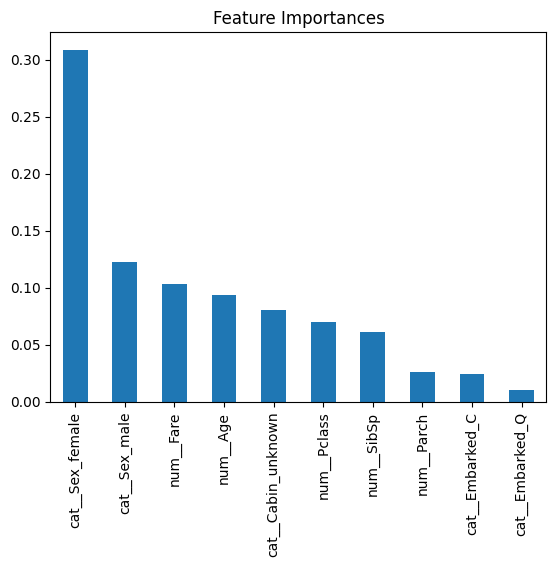

In [52]:
imp[0:10].plot(kind='bar', title='Feature Importances')

#### Predicting for test_titanic.csv

In [55]:
xnew = pd.read_csv('test_titanic.csv')
xnew

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [56]:
xnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [57]:
xnew_pre = pre.transform(xnew).toarray()
xnew_pre

array([[ 0.82737724,  0.39488658, -0.4745452 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82737724,  1.35550962,  0.43279337, ...,  0.        ,
         1.        ,  0.        ],
       [-0.36936484,  2.50825727, -0.4745452 , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 0.82737724,  0.70228595, -0.4745452 , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.82737724, -0.1046374 , -0.4745452 , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.82737724, -0.1046374 ,  0.43279337, ...,  0.        ,
         0.        ,  0.        ]])

In [58]:
xnew_pre = pd.DataFrame(xnew_pre, columns=cols)
xnew_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Cabin_A10,cat__Cabin_A14,cat__Cabin_A16,...,cat__Cabin_F33,cat__Cabin_F38,cat__Cabin_F4,cat__Cabin_G6,cat__Cabin_T,cat__Cabin_unknown,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S,cat__Embarked_unknown
0,0.827377,0.394887,-0.474545,-0.473674,-0.490783,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.827377,1.355510,0.432793,-0.473674,-0.507479,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.369365,2.508257,-0.474545,-0.473674,-0.453367,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.827377,-0.181487,-0.474545,-0.473674,-0.474005,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.827377,-0.565736,0.432793,0.767630,-0.401017,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


#### Predicting the results

In [59]:
preds = best_rfc.predict(xnew_pre)
preds

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [60]:
prob = best_rfc.predict_proba(xnew_pre)[:,1]
prob

array([0.13990504, 0.55420697, 0.20352837, 0.14000063, 0.45390663,
       0.21655756, 0.4474474 , 0.16394488, 0.76137869, 0.12683178,
       0.14000063, 0.26823314, 0.79879452, 0.18835271, 0.76439452,
       0.87331759, 0.23731749, 0.29840125, 0.4849762 , 0.76137869,
       0.25400417, 0.36679135, 0.77074262, 0.33434274, 0.86553419,
       0.16514219, 0.77750817, 0.29840125, 0.35344817, 0.11334989,
       0.18835271, 0.16507905, 0.58997806, 0.48997806, 0.45314464,
       0.2242836 , 0.45420697, 0.45420697, 0.14000063, 0.24727594,
       0.27651017, 0.35344817, 0.12888952, 0.75931405, 0.76439452,
       0.14000063, 0.43401421, 0.17147069, 0.85167484, 0.55078163,
       0.45904276, 0.24215258, 0.79970096, 0.8161335 , 0.22381925,
       0.14582548, 0.12888952, 0.14983994, 0.17037095, 0.82667484,
       0.12866693, 0.16009039, 0.12866693, 0.61411406, 0.66498828,
       0.75931405, 0.5474474 , 0.17156647, 0.43401421, 0.69852344,
       0.61411406, 0.12866693, 0.4849762 , 0.43401421, 0.82667

#### Saving preds and pron in Dataframe

In [61]:
df_final = xnew[['PassengerId']]
df_final

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [62]:
df_final['Survived_pred'] = preds
df_final['Survived_prob'] = prob

In [63]:
df_final

,PassengerId,Survived_pred,Survived_prob
0,892,0,0.139905
1,893,1,0.554207
2,894,0,0.203528
3,895,0,0.140001
4,896,0,0.453907
...,...,...,...
413,1305,0,0.140001
414,1306,1,0.826675
415,1307,0,0.128890
416,1308,0,0.140001


In [64]:
df_final.to_csv('Result.csv', index=False)

In [65]:
df_final['Survived_pred'].value_counts()

Survived_pred
0    274
1    144
Name: count, dtype: int64

<Axes: title={'center': 'Survived Predicted Counplot'}, xlabel='Survived_pred'>

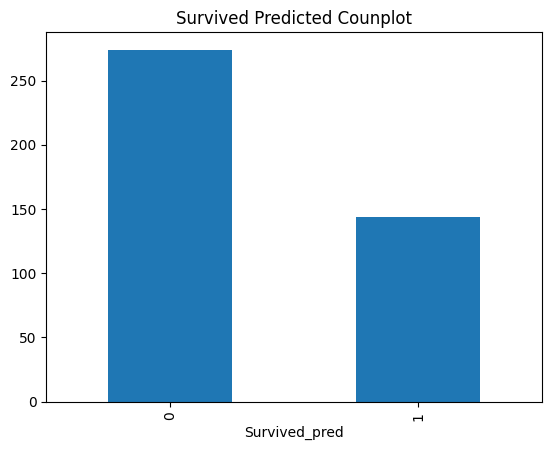

In [66]:

df_final['Survived_pred'].value_counts().plot(kind='bar', title='Survived Predicted Counplot')